In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import hbar, pi, e, epsilon_0, m_e

En pozo infinito el ancho de Aridondack Green_1412150E1 es 2.458±0.238 nm

En pozo infinito el ancho de Fort Orange_1412150E1 es 3.601±0.237 nm

En pozo infinito el ancho de Hops Yellow-2_1412150E1 es 2.786±0.243 nm

En pozo infinito el ancho de Lake Placid Blue_1412150E1 es 2.199±0.273 nm

En pozo infinito el ancho de Maple RedOrange-2_1412150E1 es 4.002±0.216 nm



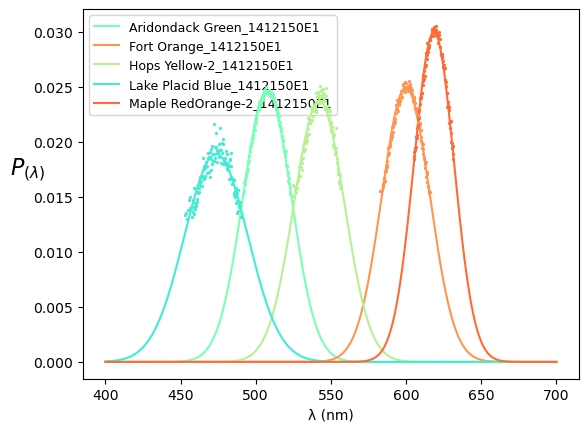

In [57]:
#En aquest treball es busca el radi de uns QD a partir de l'espectre d'emisió quant son iluminats amb una lampara UV

estm_lambda = [500,600,550,500,600]#Hi ha un background de la lampara que exita els Quantum dots, per tant, per analitzar el pic es necesita limitar el rang
doc = ['Aridondack Green_1412150E1','Fort Orange_1412150E1','Hops Yellow-2_1412150E1','Lake Placid Blue_1412150E1','Maple RedOrange-2_1412150E1'] #Noms dels documents de mesura

B, C = [], []#Per els caluls

fig=plt.figure()#Per  la gràfica
gausiana=fig.add_subplot(111)
x=np.linspace(400,700,1000)

for n_doc in range(0,len(doc)):
    data = (open(f'{doc[n_doc]}.txt').read()#transforma el documen en un str.
            .replace(' ','').replace(',','.')#Necesitem eliminar els espais i cambiar les comes al format de python per transformar-los e floats mes endevant
            .split('\n'))#Transformem en una llista partint en els punts i apart 
    
    lambda_data, intensity_data = zip(*[#Aquest format de for loop et guarda un truple, perque així no haig d'actualitzar valors i longituds de llistes potencialment llargues (poc eficient)
        (float(data[i].split(';')[0]), float(data[i].split(';')[1])) for i in range(1, len(data)-1)#Uso un for loop amb 'range' perquè et dona els indexs de les matrius 
        if estm_lambda[n_doc]-50 <= float(data[i].split(';')[0]) <= estm_lambda[n_doc]+50])#A la fila i, hi ha 4 numeros separats per ;, agafo el primer i miro si es al rang

    lambda_data, intensity_data = zip(*[#similar a l'anteror, pero aquí estic agafant nomes els valors superiors, per evitar qeu el soroll em deformi la gausiana
        (x, y) for x, y in zip(lambda_data, intensity_data)
        if np.max(intensity_data)*0.6 <= y])

    lambda_data = np.array(lambda_data)#paso els truples a matrius numpy per les operacions de linealització
    intensity_data = np.array(intensity_data)

    X=np.c_[np.ones((lambda_data.shape[0],1)),np.array([lambda_data**2,lambda_data]).T]#Mètode matricial de regresió (es molt simple de implementar i molt ràpida, peró només funciona per funcions relativament simples)
    Y=np.transpose(np.log(intensity_data))
    M=np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)
    c=np.sqrt(-1/2/M[1])
    b=M[2]*c**2
    a=np.exp(M[0]+b**2/2/c**2)

    B.append(b)#Afegeixo les constants per als càlculs
    C.append(c)

    col = plt.cm.rainbow(1-(660-b)/300) #Et dona un valor RGBT normalitzat depement del valor introduit(0-1)
    y=np.exp(-(x-b)**2/2/c**2)/(c*np.sqrt(2*np.pi))#plot de la gausiana trobada
    gausiana.scatter(lambda_data,intensity_data/a/(c*np.sqrt(2*np.pi)),color=col, marker='.',s=7,zorder=12)
    gausiana.plot(x,y,color=col,label=doc[n_doc],zorder=6)

gausiana.set_xlabel('λ (nm)')
gausiana.set_ylabel(r'$P_{(λ)}$',fontsize=16,rotation=0,y=0.53)
gausiana.legend(fontsize=9)

Eg=1.74*e
mh=0.45*m_e
me=0.11*m_e
hi=hbar
h=hi*2*np.pi
E=6.3**epsilon_0
ce=3*10**8

en=[]
for p in range(0,len(doc)):
    li=1/np.roots([(hi*np.pi)**2/2*(1/me+1/mh),-1.8*e**2/4/np.pi/E,Eg-h*ce/B[p]/10**-9])[0]#Càlculs per trobar el radi del QD i 
    yi=1/np.roots([(hi*np.pi)**2/2*(1/me+1/mh),-1.8*e**2/4/np.pi/E,Eg-h*ce/C[p]/10**-9])[0]#distribució de mides
    print(f'En pozo infinito el ancho de {doc[p]} es {li*10**9:.{4}}±{yi*10**9:.{3}} nm\n')